In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('D:/pycharm--------/Heart_Disease_Project/data/heart_disease.csv')

In [3]:
df.describe()
df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       307 non-null    float64
 1   sex       309 non-null    float64
 2   cp        309 non-null    float64
 3   trestbps  308 non-null    float64
 4   chol      305 non-null    object 
 5   fbs       307 non-null    float64
 6   restecg   309 non-null    float64
 7   thalach   307 non-null    float64
 8   exang     310 non-null    int64  
 9   oldpeak   309 non-null    float64
 10  slope     310 non-null    int64  
 11  ca        308 non-null    float64
 12  thal      308 non-null    float64
 13  target    310 non-null    int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 34.0+ KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
305,69.0,0.0,3.0,140.0,239,0.0,1.0,151.0,0,1.8,2,2.0,2.0,1
306,41.0,0.0,1.0,130.0,204,0.0,0.0,172.0,0,1.4,2,0.0,2.0,1
307,56.0,1.0,1.0,120.0,236,0.0,1.0,178.0,0,0.8,2,0.0,2.0,1
308,NaN,0.0,0.0,120.0,354,0.0,1.0,163.0,1,0.6,2,0.0,2.0,1
309,57.0,1.0,0.0,140.0,192,0.0,1.0,148.0,0,0.4,1,0.0,1.0,1


In [4]:
df.isnull().sum()

age         3
sex         1
cp          1
trestbps    2
chol        5
fbs         3
restecg     1
thalach     3
exang       0
oldpeak     1
slope       0
ca          2
thal        2
target      0
dtype: int64

In [5]:
df = df[df['chol'] != 'twenty']
df['chol'] = pd.to_numeric(df['chol'], errors='coerce')
df['age']=df.age.fillna(df.age.mean())
df.sex =df['sex'].fillna(df.sex.mean())
df.cp=df['cp'].fillna(df.cp.mean())
df.trestbps=df['trestbps'].fillna(df.trestbps.mean())
df.chol=df['chol'].fillna(df.chol.mode()[0])
df.fbs=df['fbs'].fillna(df.fbs.mean())
df.restecg=df['restecg'].fillna(df.restecg.mean())
df.thalach=df['thalach'].fillna(df.thalach.mean())
df.exang=df['exang'].fillna(df.exang.mean())
df.oldpeak=df['oldpeak'].fillna(df.oldpeak.mean())
df.slope=df['slope'].fillna(df.slope.mean())
df.ca=df['ca'].fillna(df.ca.mean())
df.thal=df['thal'].fillna(df.thal.mean())

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

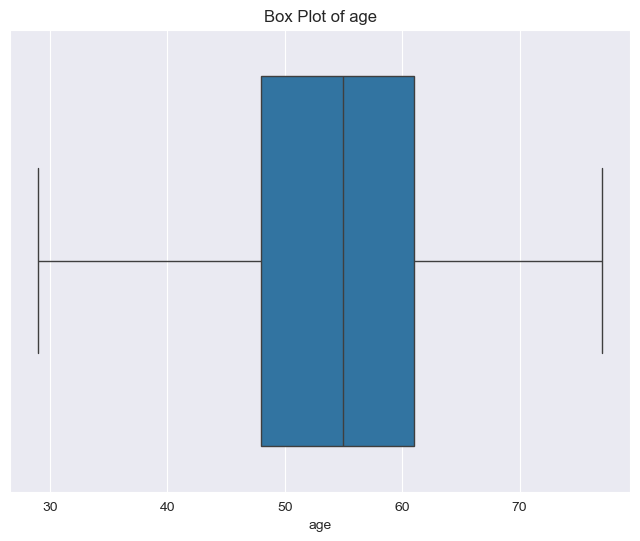

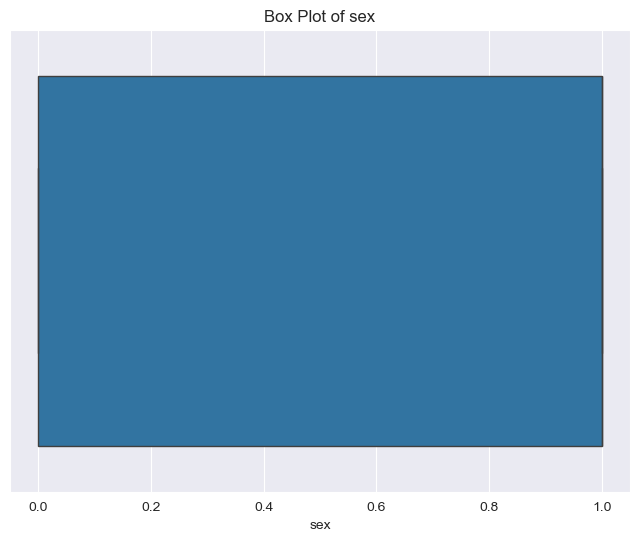

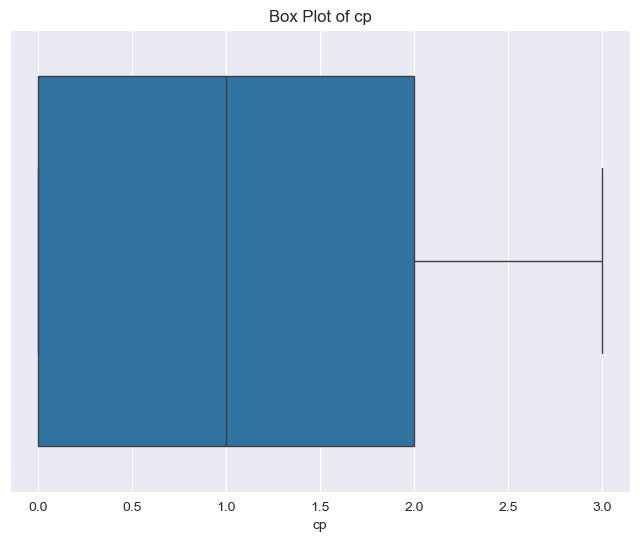

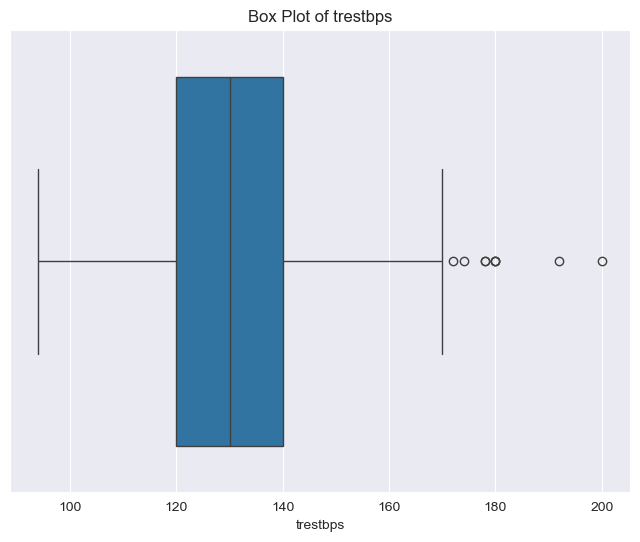

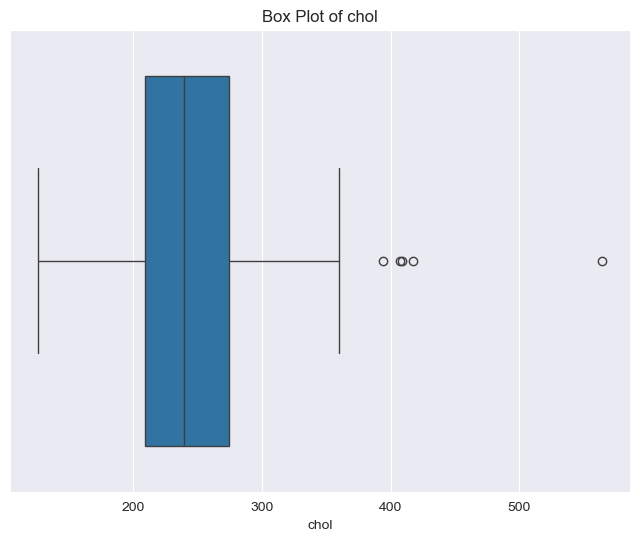

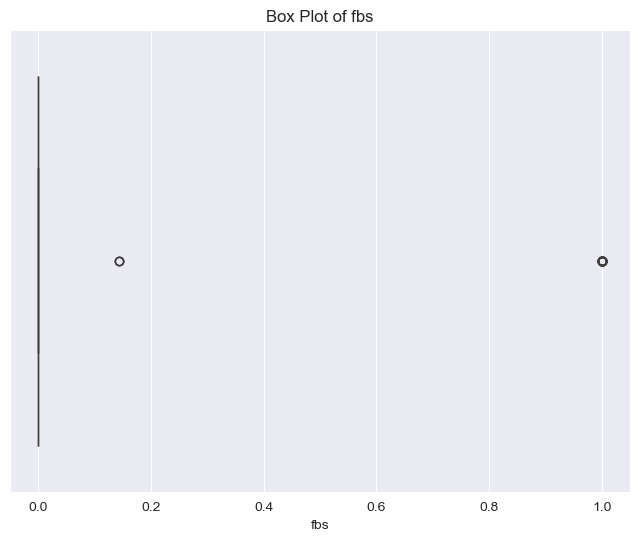

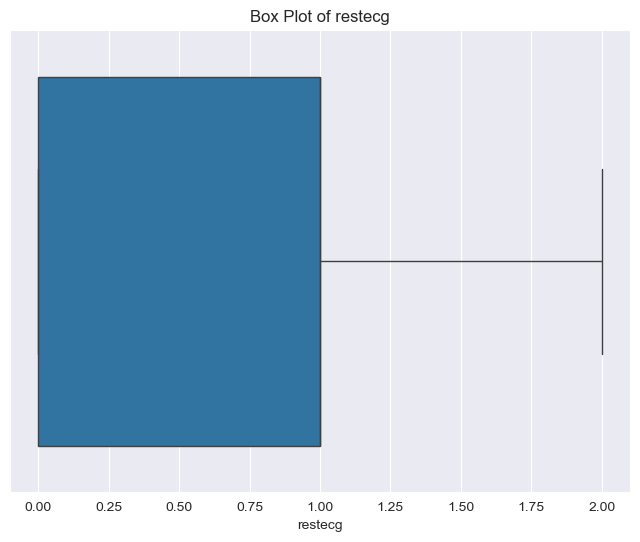

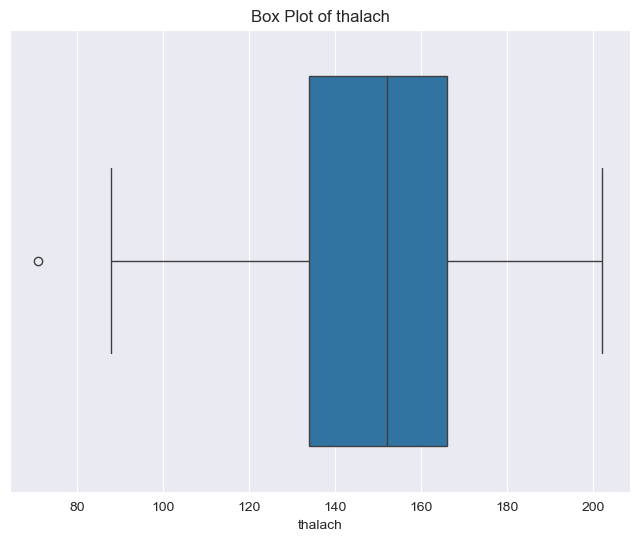

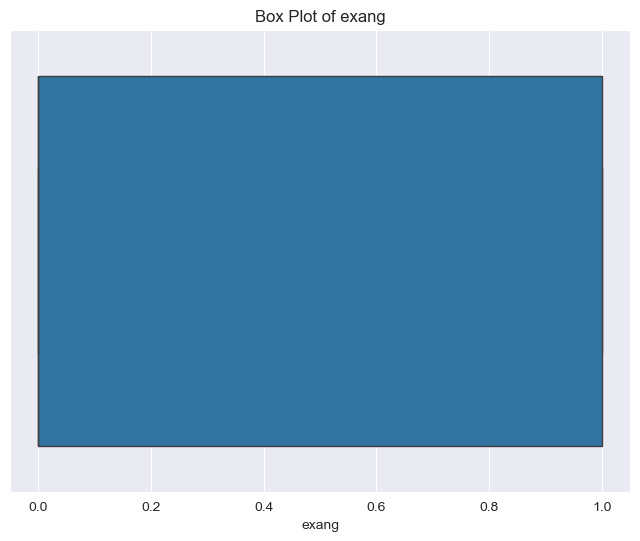

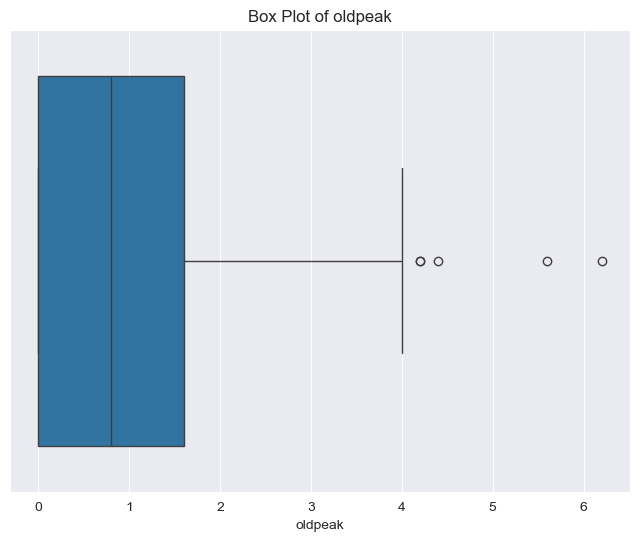

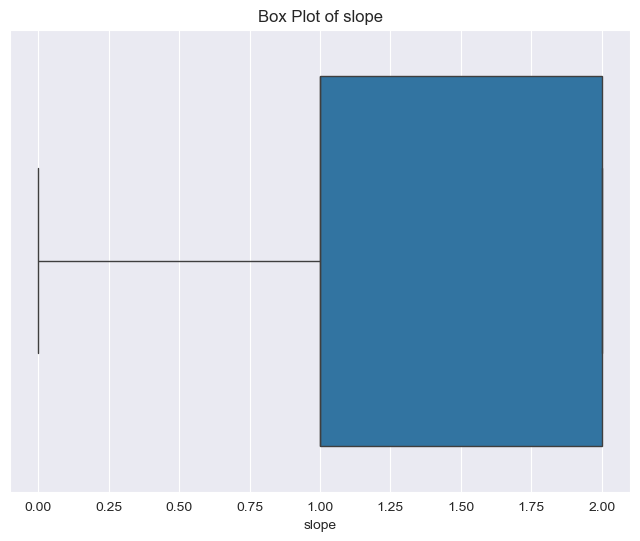

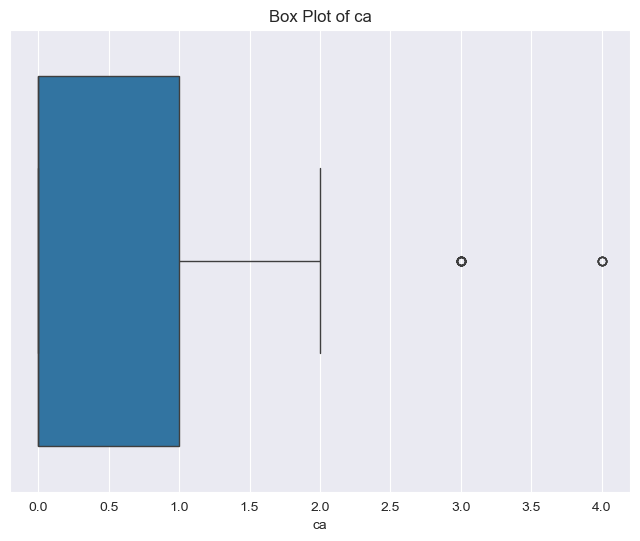

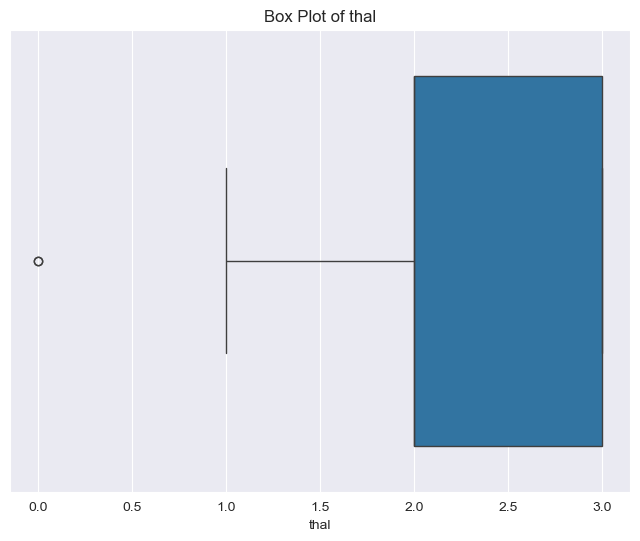

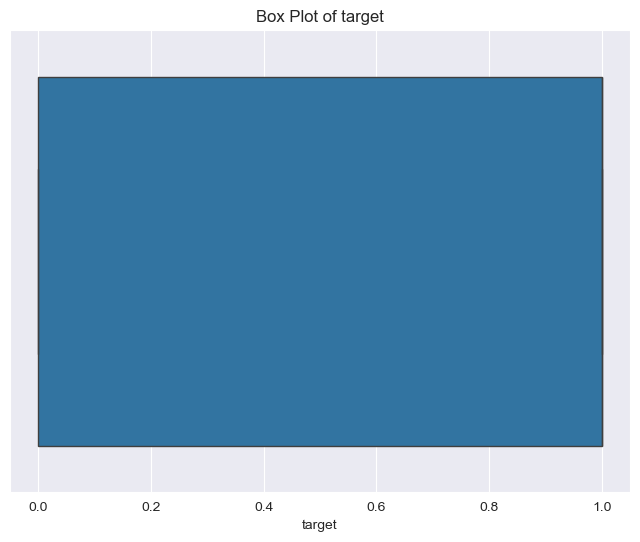

In [7]:
for column in df:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

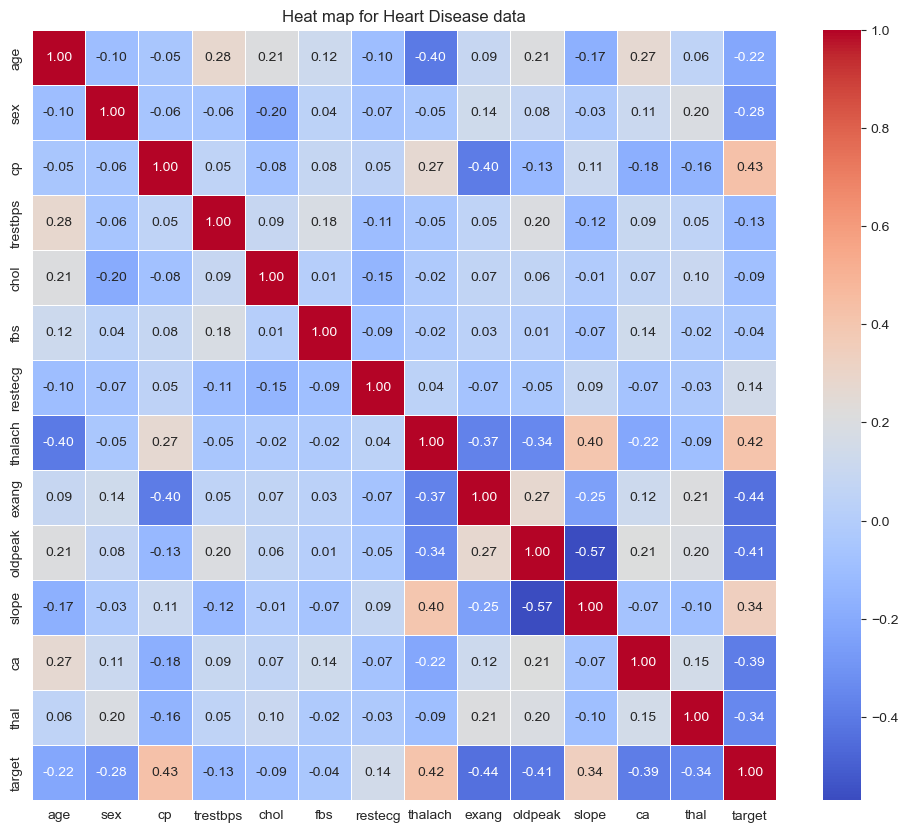

In [8]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heat map for Heart Disease data')
plt.show()

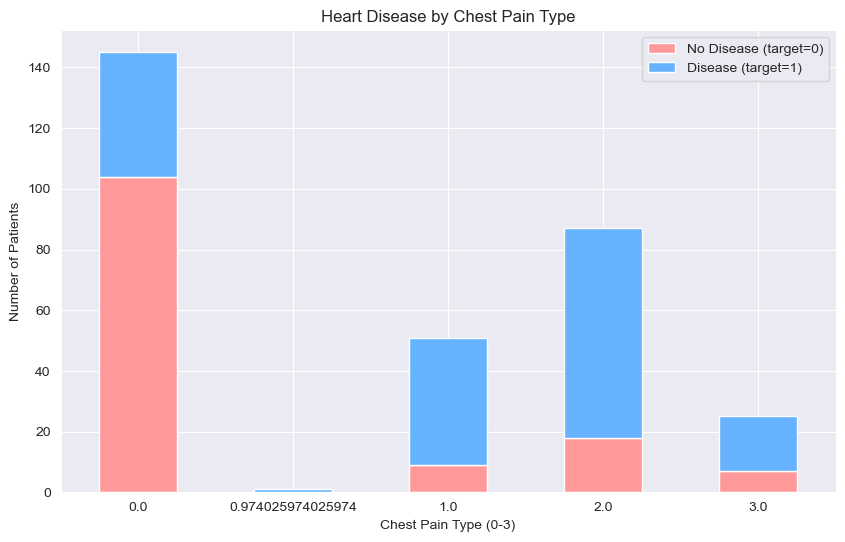

In [9]:
ct = pd.crosstab(df['cp'], df['target'])
ct.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'], figsize=(10, 6))
plt.title("Heart Disease by Chest Pain Type")
plt.xlabel("Chest Pain Type (0-3)")
plt.ylabel("Number of Patients")
plt.legend(["No Disease (target=0)", "Disease (target=1)"])
plt.xticks(rotation=0)
plt.show()

In [10]:
df.to_pickle("df.pkl")